# Decision Tree classification

Confusion Matrix:


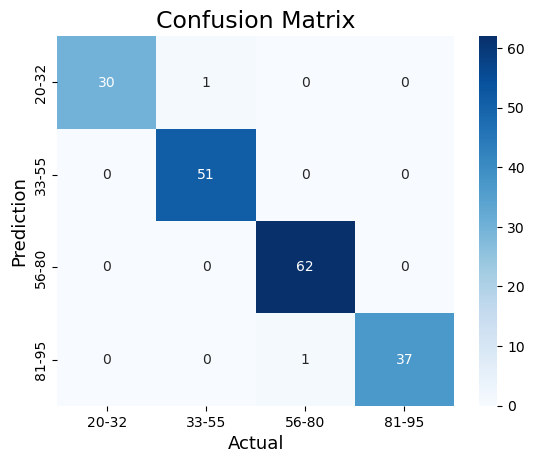

The accuracy score is 0.989010989010989


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection  import train_test_split

humidity= pd.read_csv("range.csv")
humidity.columns=humidity.columns.str.lower()


y=humidity["range"]
x=humidity[["temperature","resistance"]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

#print(classification_report(y_test,y_pred))
cm=(confusion_matrix(y_test,y_pred))



print("Confusion Matrix:")


class_labels=["20-32","33-55","56-80","81-95"]

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            cmap="Blues",
            annot=True,
            fmt='g',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

from sklearn.metrics import accuracy_score
print("The accuracy score is", accuracy_score(y_pred,y_test))

In [10]:
#Root mean square error:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred_new=[]
y_test_new=[]

# Calculate RMSE
for i in y_pred:
    x=int(i[:2])
    y=int(i[3:])
    i=x+y
    y_pred_new.append(i)

for i in y_test:
    x=int(i[:2])
    y=int(i[3:])
    i=x+y
    y_test_new.append(i)
mse=mean_squared_error(y_pred_new,y_test_new)
rmse = np.sqrt(mean_squared_error(y_pred_new,y_test_new))

print("Root Mean Square Error:", rmse)
print("mean square error:",mse)

Root Mean Square Error: 3.9397941598487125
mean square error: 15.521978021978022


In [11]:
from sklearn.metrics import r2_score
r2_score(y_test_new,y_pred_new)

0.9912947506999629